In [1]:
import sys
import os
import matplotlib.pyplot as plt
import numpy as np

sys.path.append(os.path.abspath(os.path.join('..')))
from src.utils import estimate_r0_empirical

In [2]:
N = 5000
gamma = 1.0/7.0
C = 8
dt = 1.0
betas = np.arange(0.05, 0.31, 0.025)

r0_estimates = []
theoretical_r0 = []

print("Starting R0 estimation sweep...")
for beta in betas:
    # Empirical
    r0_hat = estimate_r0_empirical(beta, gamma, C, dt=dt, n_runs=200)
    r0_estimates.append(r0_hat)
    
    # Theoretical: R0 approx (C * p_trans) / p_rec
    p_trans = 1 - np.exp(-beta * dt)
    p_rec = 1 - np.exp(-gamma * dt)
    theo = (C * p_trans) / p_rec
    theoretical_r0.append(theo)

Starting R0 estimation sweep...


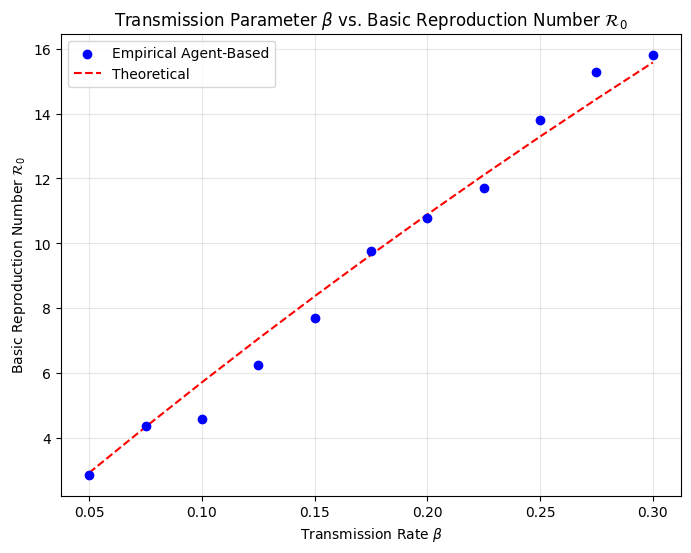

Plot saved to plots/02_r0_estimation.png


In [3]:
plt.figure(figsize=(8, 6))
plt.scatter(betas, r0_estimates, color='blue', label='Empirical Agent-Based', zorder=5)
plt.plot(betas, theoretical_r0, color='red', linestyle='--', label='Theoretical')

plt.title(r'Transmission Parameter $\beta$ vs. Basic Reproduction Number $\mathcal{R}_0$')
plt.xlabel(r'Transmission Rate $\beta$')
plt.ylabel(r'Basic Reproduction Number $\mathcal{R}_0$')
plt.grid(True, alpha=0.3)
plt.legend()

plt.savefig('../plots/02_r0_estimation.png', dpi=300)
plt.show()
print("Plot saved to plots/02_r0_estimation.png")